In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus



A)

In [ ]:
data = pd.read_csv('KDD.csv')
print(data.head())


   duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0         0        181       5450     0               0       0    0   
1         0        239        486     0               0       0    0   
2         0        235       1337     0               0       0    0   
3         0        219       1337     0               0       0    0   
4         0        217       2032     0               0       0    0   

   num_failed_logins  logged_in  num_compromised  ...  dst_host_srv_count  \
0                  0          1                0  ...                   9   
1                  0          1                0  ...                  19   
2                  0          1                0  ...                  29   
3                  0          1                0  ...                  39   
4                  0          1                0  ...                  49   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0  

In [ ]:
X = data.drop('target', axis=1)
Y = data['target']
# Number of data rows
num_rows = data.shape[0]
print("Number of data rows:", num_rows)

# Number of missing rows
num_missing_rows = data.isnull().any(axis=1).sum()
print("Number of missing rows:", num_missing_rows)


Number of data rows: 494021
Number of missing rows: 0


In [ ]:
data.dropna(inplace=True)


In [ ]:
X = data.drop('target', axis=1)
Y = data['target']
# Number of data rows
num_rows = data.shape[0]
print("Number of data rows:", num_rows)

# Number of missing rows
num_missing_rows = data.isnull().any(axis=1).sum()
print("Number of missing rows:", num_missing_rows)

Number of data rows: 494021
Number of missing rows: 0


In [ ]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
selector = SelectKBest(score_func=mutual_info_classif, k=9)
X_selected = selector.fit_transform(X_normalized, Y)


In [ ]:


print(X_selected.shape)

X_selected = pd.DataFrame(X_selected)
print(X_selected.head)

(494021, 9)
<bound method NDFrame.head of                    0         1    2         3         4         5         6  \
0       2.610418e-07  0.001057  1.0  0.015656  0.015656  0.035294  0.035294   
1       3.446905e-07  0.000094  1.0  0.015656  0.015656  0.074510  0.074510   
2       3.389216e-07  0.000259  1.0  0.015656  0.015656  0.113725  0.113725   
3       3.158461e-07  0.000259  1.0  0.011742  0.011742  0.152941  0.152941   
4       3.129617e-07  0.000394  1.0  0.011742  0.011742  0.192157  0.192157   
...              ...       ...  ...       ...       ...       ...       ...   
494016  4.470881e-07  0.000365  1.0  0.007828  0.009785  0.337255  1.000000   
494017  4.067060e-07  0.000443  1.0  0.011742  0.011742  0.023529  1.000000   
494018  2.927706e-07  0.000233  1.0  0.011742  0.035225  0.062745  1.000000   
494019  4.196859e-07  0.000233  1.0  0.011742  0.023483  0.101961  1.000000   
494020  3.158461e-07  0.000239  1.0  0.011742  0.068493  0.023529  1.000000   

         

B)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Splitting my_data into my_data1 (70-30 split)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_selected, Y, test_size=0.3, random_state=42)

# Creating and training the Decision Tree classifier for my_data1
dt_classifier1 = DecisionTreeClassifier()
dt_classifier1.fit(X_train1, y_train1)

# Predicting on the test set and computing classification report for my_data1
y_pred1 = dt_classifier1.predict(X_test1)
classification_report1 = classification_report(y_test1, y_pred1)
print("Classification Report for 70-30:")
print(classification_report1)

# Splitting my_data into my_data2 (60-40 split)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_selected, Y, test_size=0.4, random_state=42)

# Creating and training the Decision Tree classifier for my_data2
dt_classifier2 = DecisionTreeClassifier()
dt_classifier2.fit(X_train2, y_train2)

# Predicting on the test set and computing classification report for my_data2
y_pred2 = dt_classifier2.predict(X_test2)
classification_report2 = classification_report(y_test2, y_pred2)
print("Classification Report for 60-40:")
print(classification_report2)

# Splitting my_data into my_data3 (50-50 split)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_selected, Y, test_size=0.5, random_state=42)

# Creating and training the Decision Tree classifier for my_data3
dt_classifier3 = DecisionTreeClassifier()
dt_classifier3.fit(X_train3, y_train3)

# Predicting on the test set and computing classification report for my_data3
y_pred3 = dt_classifier3.predict(X_test3)
classification_report3 = classification_report(y_test3, y_pred3)
print("Classification Report for 50-50:")
print(classification_report3)

#putting the classifiers inside a list
basic_classifiers = [dt_classifier1,dt_classifier2,dt_classifier3]

Classification Report for 70-30:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29192
           1       1.00      1.00      1.00    119015

    accuracy                           1.00    148207
   macro avg       1.00      1.00      1.00    148207
weighted avg       1.00      1.00      1.00    148207

Classification Report for 60-40:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38977
           1       1.00      1.00      1.00    158632

    accuracy                           1.00    197609
   macro avg       1.00      1.00      1.00    197609
weighted avg       1.00      1.00      1.00    197609

Classification Report for 50-50:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48650
           1       1.00      1.00      1.00    198361

    accuracy                           1.00    247011
   macro avg       1.00      

C)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

def get_best_decision_tree(classifiers):
    best_tree = None
    best_f1_score = 0.0

    for i, tree in enumerate(classifiers):
        predictions = tree.predict(X_test)
        f1 = f1_score(y_test, predictions)

        if f1 > best_f1_score:
            best_f1_score = f1
            best_tree = tree


    print("Best max depth:", best_tree.max_depth)

    return best_tree


# Define the maximum depth values to consider
max_depth_values = [4, 6, 8]

# Create a list to store the Decision Tree classifiers
dt_classifiers = []
best_classifiers = [1,1,1]
best_f1_scores = [0,0,0]
best_tree = None
best_f1_score = 0.0
best_data_split_ratio = 0;
# Iterate over each dataset and maximum depth value
for i, (X_train, X_test, y_train, y_test) in enumerate([(X_train1, X_test1, y_train1, y_test1),
                                                       (X_train2, X_test2, y_train2, y_test2),
                                                       (X_train3, X_test3, y_train3, y_test3)]):


    for j, max_depth in enumerate(max_depth_values):
        # Create and train the Decision Tree classifier
        dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
        dt_classifier.fit(X_train, y_train)
        dt_classifiers.append(dt_classifier)
        predictions = dt_classifier.predict(X_test)
        f1 = f1_score(y_test, predictions)
        if f1 > best_f1_score:
            best_f1_score = f1
            best_tree = dt_classifier
            best_data_split_ratio = i;
        print("Iteration:", i)
        print("Max depth:", max_depth)
        print("F1 score:", f1)
        print()
        if f1 > best_f1_scores[i]:
          best_f1_scores[i] = f1
          best_classifiers[i] = dt_classifier
print(best_f1_scores)
print(best_classifiers)
print('final result:')
ratios = ['70-30','60-40','50-50']
print('best ratio: ',ratios[best_data_split_ratio])
print('best tree:',best_tree)
# Get the best decision tree classifier



Iteration: 0
Max depth: 4
F1 score: 0.9949032542700477

Iteration: 0
Max depth: 6
F1 score: 0.9973309795515204

Iteration: 0
Max depth: 8
F1 score: 0.9982773688279386

Iteration: 1
Max depth: 4
F1 score: 0.9948370421736116

Iteration: 1
Max depth: 6
F1 score: 0.9972881270417882

Iteration: 1
Max depth: 8
F1 score: 0.9982061168577725

Iteration: 2
Max depth: 4
F1 score: 0.9944895174733996

Iteration: 2
Max depth: 6
F1 score: 0.9971978339331969

Iteration: 2
Max depth: 8
F1 score: 0.9981391830559758

[0.9982773688279386, 0.9982061168577725, 0.9981391830559758]
[DecisionTreeClassifier(criterion='entropy', max_depth=8), DecisionTreeClassifier(criterion='entropy', max_depth=8), DecisionTreeClassifier(criterion='entropy', max_depth=8)]
final result:
best ratio:  70-30
best tree: DecisionTreeClassifier(criterion='entropy', max_depth=8)


increeasing data in the training partition added a small improvement in the f1 score

the best f1 score comes when max iteration = 8 for  KDD.CSV data


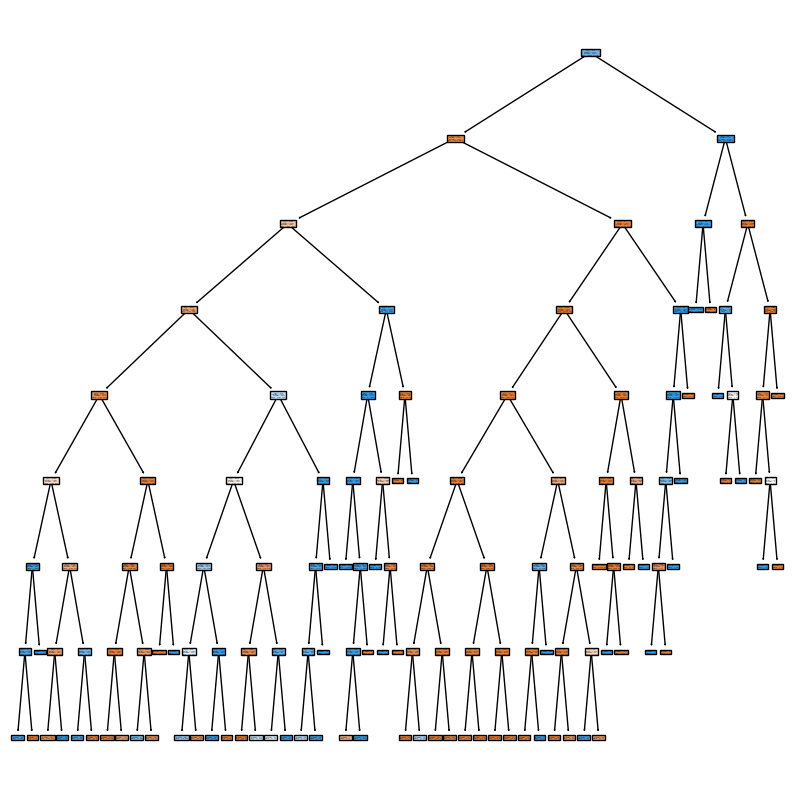

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

def plot_decision_tree(decision_tree):
    fig, ax = plt.subplots(figsize=(10, 10))
    plot_tree(decision_tree, filled=True, ax=ax)
    # plot_tree(dt_classifier, filled=True, ax=ax, fontsize=10, feature_names=X.columns, class_names=["Class 0", "Class 1"])
    plt.show()

plot_decision_tree(best_tree)


now another visualisation for the tree

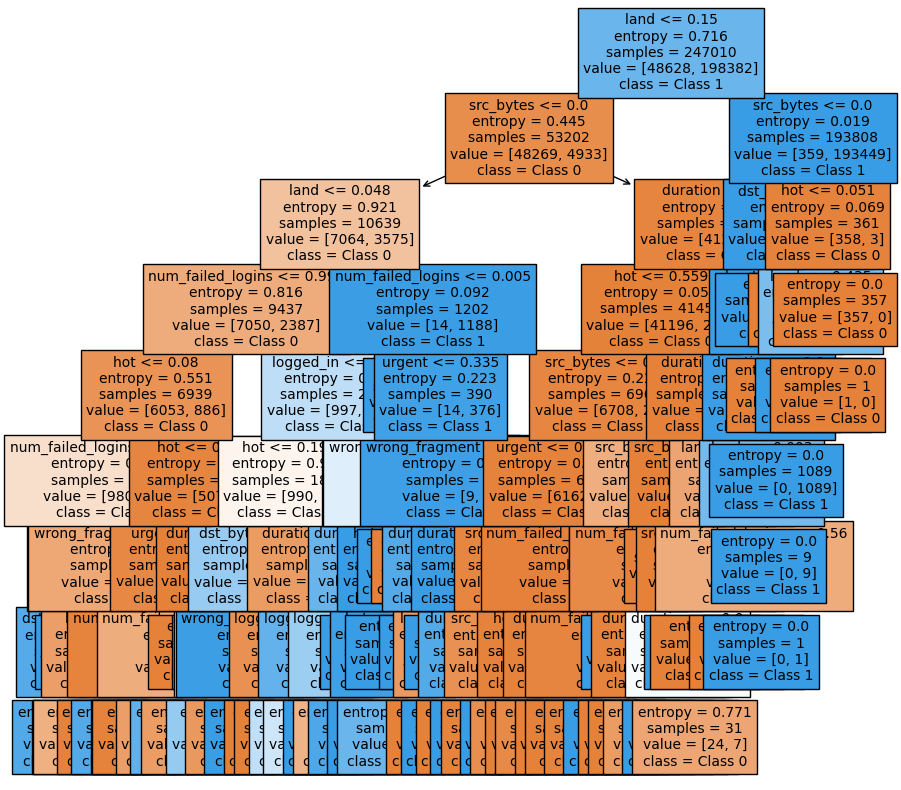

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

def plot_decision_tree(decision_tree):
    fig, ax = plt.subplots(figsize=(10, 10))
    # plot_tree(decision_tree, filled=True, ax=ax)
    plot_tree(dt_classifier, filled=True, ax=ax, fontsize=10, feature_names=X.columns, class_names=["Class 0", "Class 1"])
    plt.show()

plot_decision_tree(best_tree)


D)

In [ ]:
# classifiers before tuning
basic_classifiers

[DecisionTreeClassifier(), DecisionTreeClassifier(), DecisionTreeClassifier()]

In [ ]:
# best classifiers after tuning
print(best_classifiers)
print(best_f1_scores)

[DecisionTreeClassifier(criterion='entropy', max_depth=8), DecisionTreeClassifier(criterion='entropy', max_depth=8), DecisionTreeClassifier(criterion='entropy', max_depth=8)]
[0.9982773688279386, 0.9982061168577725, 0.9981391830559758]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def display_model_evaluation(decision_tree_model, X_test, y_test,label):
    # Get predicted labels
    y_pred = decision_tree_model.predict(X_test)

    # Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy Score:")
    print(accuracy)

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(label)
    plt.show()


basic-70-30
Accuracy Score:
0.9991633323662176

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29192
           1       1.00      1.00      1.00    119015

    accuracy                           1.00    148207
   macro avg       1.00      1.00      1.00    148207
weighted avg       1.00      1.00      1.00    148207


Confusion Matrix:
[[ 29141     51]
 [    73 118942]]


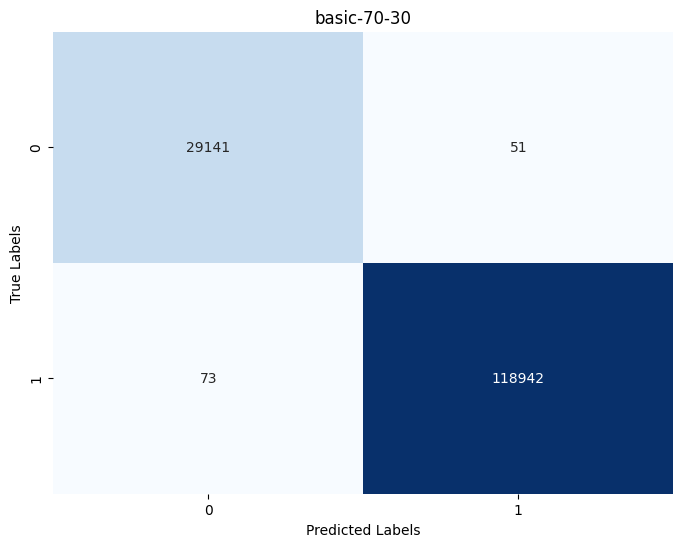

tuned-70-30
Accuracy Score:
0.997233598952816

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     29192
           1       1.00      1.00      1.00    119015

    accuracy                           1.00    148207
   macro avg       1.00      1.00      1.00    148207
weighted avg       1.00      1.00      1.00    148207


Confusion Matrix:
[[ 28998    194]
 [   216 118799]]


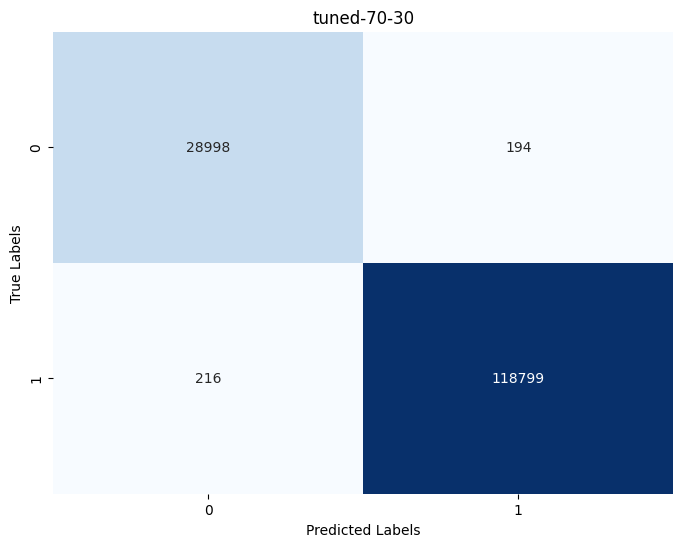

In [ ]:
#for data ratio 70-30
print('basic-70-30')
display_model_evaluation(basic_classifiers[0],X_test1,y_test1,'basic-70-30')
print('tuned-70-30')
display_model_evaluation(best_classifiers[0],X_test1,y_test1,'tuned-70-30')

basic-60-40
Accuracy Score:
0.9989575373591284

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38977
           1       1.00      1.00      1.00    158632

    accuracy                           1.00    197609
   macro avg       1.00      1.00      1.00    197609
weighted avg       1.00      1.00      1.00    197609


Confusion Matrix:
[[ 38872    105]
 [   101 158531]]


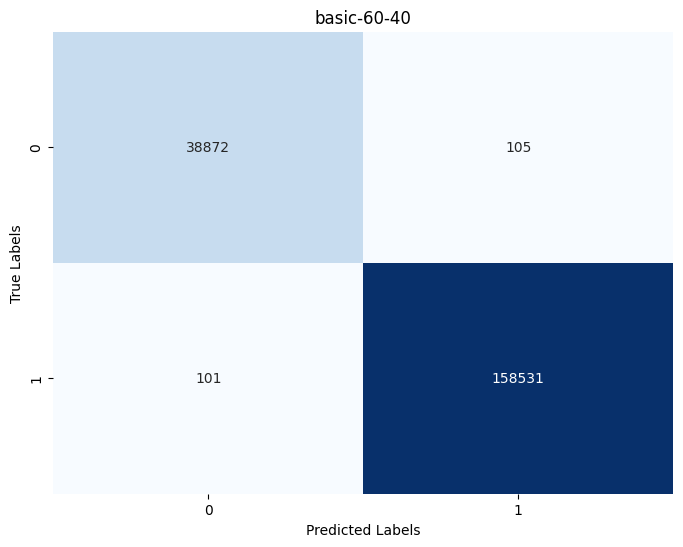

tuned-60-40
Accuracy Score:
0.9971205764919614

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     38977
           1       1.00      1.00      1.00    158632

    accuracy                           1.00    197609
   macro avg       1.00      1.00      1.00    197609
weighted avg       1.00      1.00      1.00    197609


Confusion Matrix:
[[ 38730    247]
 [   322 158310]]


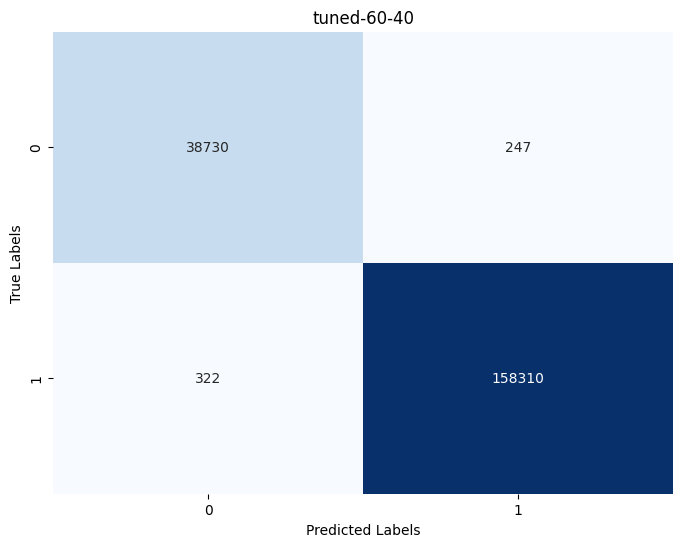

In [ ]:
#for data ratio 60-40
print('basic-60-40')
display_model_evaluation(basic_classifiers[1],X_test2,y_test2,'basic-60-40')
print('tuned-60-40')
display_model_evaluation(best_classifiers[1],X_test2,y_test2,'tuned-60-40')

basic-50-50
Accuracy Score:
0.9989555121026998

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48650
           1       1.00      1.00      1.00    198361

    accuracy                           1.00    247011
   macro avg       1.00      1.00      1.00    247011
weighted avg       1.00      1.00      1.00    247011


Confusion Matrix:
[[ 48522    128]
 [   130 198231]]


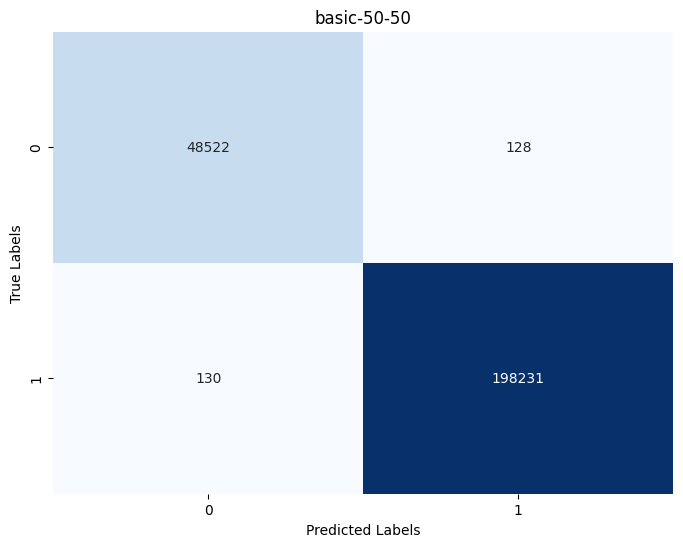

tuned-50-50
Accuracy Score:
0.9970122788053973

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     48650
           1       1.00      1.00      1.00    198361

    accuracy                           1.00    247011
   macro avg       0.99      1.00      1.00    247011
weighted avg       1.00      1.00      1.00    247011


Confusion Matrix:
[[ 48342    308]
 [   430 197931]]


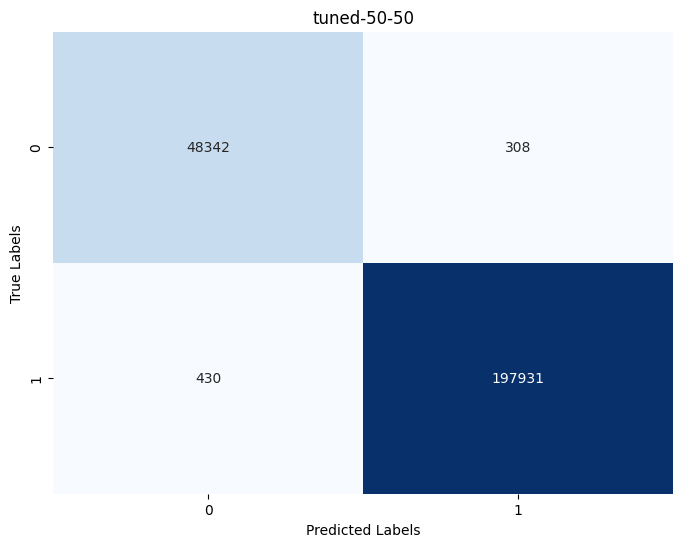

In [ ]:
#for data ratio 70-30
print('basic-50-50')
display_model_evaluation(basic_classifiers[2],X_test3,y_test3,'basic-50-50')
print('tuned-50-50')
display_model_evaluation(best_classifiers[2],X_test3,y_test3,'tuned-50-50')

E)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

def evaluate_decision_tree(criterion='gini', max_depth=None,
                           min_samples_split=2, min_samples_leaf=1, max_features=None,
                           splitter='best', min_impurity_decrease=0.0):
    # Create a decision tree classifier with the given hyperparameters
    decision_tree = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth,
                                           min_samples_split=min_samples_split,
                                           min_samples_leaf=min_samples_leaf,
                                           max_features=max_features, splitter=splitter,
                                           min_impurity_decrease=min_impurity_decrease)

    # Fit the model on the training data
    decision_tree.fit(X_train1, y_train1)

    # Get predictions on both training and testing data
    y_train_pred = decision_tree.predict(X_train1)
    y_test_pred = decision_tree.predict(X_test1)

    # Calculate the F1 score for training and testing data
    f1_train = f1_score(y_train1, y_train_pred)
    f1_test = f1_score(y_test1, y_test_pred)

    # Print the F1 scores
    print("F1 Score - Training Data:", f1_train)
    print("F1 Score - Testing Data:", f1_test)


In [101]:
evaluate_decision_tree( max_depth=10,max_features=10)

F1 Score - Training Data: 0.9977452846219241
F1 Score - Testing Data: 0.9974130217367452
Mean F1 Score (Cross-Validation): 0.9902943642190429


there is no over fitting actually

its over fitting when f1 score in training is much better than in testing but the difference here is not citical





we should try  mitigation strategies

(pre-prunning, post-prunning and k-fold
cross validation)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, train_test_split

def evaluate_decision_tree( criterion='gini', max_depth=None, min_samples_split=2,
                           min_samples_leaf=1, max_features=None, splitter='best',
                           min_impurity_decrease=0.0, cv=5,ccp_alpha=0):
    # Split the data into training and testing sets


    # Create a decision tree classifier with the given hyperparameters
    decision_tree = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth,
                                           min_samples_split=min_samples_split,
                                           min_samples_leaf=min_samples_leaf,
                                           max_features=max_features, splitter=splitter,
                                           min_impurity_decrease=min_impurity_decrease,ccp_alpha=ccp_alpha)

    # Pre-pruning: Limit maximum depth and minimum samples per leaf
    if max_depth is not None:
        decision_tree.set_params(max_depth=max_depth)
    if min_samples_leaf is not None:
        decision_tree.set_params(min_samples_leaf=min_samples_leaf)

    # Fit the model on the training data
    decision_tree.fit(X_train1, y_train1)

    # Get predictions on both training and testing data
    y_train_pred = decision_tree.predict(X_train1)
    y_test_pred = decision_tree.predict(X_test1)

    # Calculate the F1 scores for training and testing data
    f1_train = f1_score(y_train1, y_train_pred, average='macro')
    f1_test = f1_score(y_test1, y_test_pred, average='macro')

    # Perform k-fold cross-validation
    f1_scores = cross_val_score(decision_tree, X_selected, Y, scoring='f1_macro', cv=cv)

    # Calculate the mean F1 score across all folds
    mean_f1_score = f1_scores.mean()

    # Print the F1 scores
    print("F1 Score - Training Data:", f1_train)
    print("F1 Score - Testing Data:", f1_test)
    print("Mean F1 Score (Cross-Validation):", mean_f1_score)


starting with cross validatoin

In [ ]:
# Example usage
evaluate_decision_tree(cv=10)


F1 Score - Training Data: 0.9999268506230534
F1 Score - Testing Data: 0.9986565772830159
Mean F1 Score (Cross-Validation): 0.9934911011974705


now we add pre pruning

In [ ]:

evaluate_decision_tree(min_samples_leaf =5,max_depth=3, cv=10)

F1 Score - Training Data: 0.9800847601117524
F1 Score - Testing Data: 0.9793532087379342
Mean F1 Score (Cross-Validation): 0.9814885060331507


now post pruning

In [ ]:
evaluate_decision_tree(min_samples_leaf =5,max_depth=3, cv=10,ccp_alpha = 0.27)

F1 Score - Training Data: 0.9691362667037001
F1 Score - Testing Data: 0.9684640690420374
Mean F1 Score (Cross-Validation): 0.9693515343313802
